# Análise de dados do datasus e Wikipedia
https://datasus.saude.gov.br/informacoes-de-saude-tabnet/  

---

Procedimentos hospitalares do SUS - por local de internação - Brasil  
Valor total por Unidade da Federação e Ano/mês processamento  
Período: Jan/2008 a Ago/2020  
<br>
<br>
https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

---

Esta é uma lista da população das unidades federativas brasileiras segundo estimativas de 1º de julho de 2020 do Instituto Brasileiro de Geografia e Estatística (IBGE).  

# Leitura e processamento inicial dos dados

In [1]:
# imports...
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import numpy as np
import pandas as pd

# personalizando opções gerais dos módulos
pd.options.display.float_format = lambda item: f'{item:.2f}'
sns.set_style("whitegrid")

Lendo dados do datasus

In [2]:
# url do dataset
datasus_url = 'https://raw.githubusercontent.com/LucasGabrielB/-Alura-Bootcamp-Data-Science-Aplicada/main/Modulo-01/datasets/Valor%20total%20por%20Ano-m%C3%AAs%20processamento%20segundo%20Unidade%20da%20Federa%C3%A7%C3%A3o.csv'

# criando o dataframe apartir da url do arquivo
df_datasus = pd.read_csv(datasus_url,
                 encoding='ISO-8859-1',
                 sep=';',
                 skiprows=3,
                 skipfooter=12,
                 thousands='.',
                 decimal=',',
                 engine='python',
                 na_values='-',
                 index_col='Unidade da Federação')

# removendo o codigo da UF
df_datasus.index = [' '.join(i[1:]) for i in df_datasus.index.str.split(' ')]

In [3]:
df_datasus.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,5062171.26,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,nan,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,2685361.47,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,nan,420668039.63
Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,10179342.29,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,1344865.94,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,261

Lendo dados da Wikipedia

In [53]:
# url da pagina
wikipedia_url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'

# extraindo o dataframe apartir da url da pagina
df_wikipedia = pd.read_html(wikipedia_url)[0]
df_wikipedia = df_wikipedia[['Unidade federativa', 'População', '% da pop. total']]
df_wikipedia.set_index('Unidade federativa', inplace=True)

# convertendo os valores
df_wikipedia['População'] = df_wikipedia['População'].str.replace(' ', '').astype(int)
df_wikipedia['% da pop. total'] = df_wikipedia['% da pop. total'].str.replace('%', '')
df_wikipedia['% da pop. total'] = df_wikipedia['% da pop. total'].str.replace(',', '.').astype(float)

In [54]:
df_wikipedia.head()

,População,% da pop. total
Unidade federativa,,
São Paulo,46289333,21.90
Minas Gerais,21331292,10.10
Rio de Janeiro,17366189,8.20
Bahia,14930634,7.10
Paraná,11516840,5.40


# Análise de dados 


In [5]:
# pega o nome da penúltima coluna do dataframe (última é o "Total")
most_recent_month = df_datasus.columns[-2]

# dataframe com os gastos do ultimo mes
df_recent_month_spending = df_datasus.dropna().sort_values(by=most_recent_month)[most_recent_month]

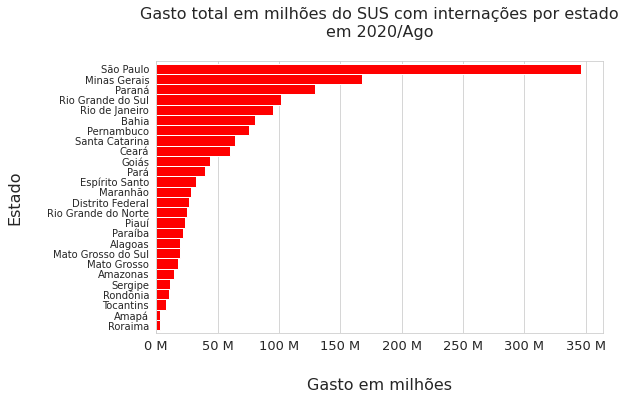

In [6]:
ax = (df_recent_month_spending/1e6).plot(figsize=(8, 5),
                cmap="flag",
                kind='barh',
                width=1)

# formatando a apresentação dos numeros
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.0f} M'))

# personalizando grafico
plt.xlabel('Gasto em milhões', labelpad=25, fontsize=16)
plt.ylabel('Estado', labelpad=25, fontsize=16)
plt.title(f'Gasto total em milhões do SUS com internações por estado\nem {most_recent_month}', pad=25, fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', grid_alpha=0)

plt.show()

In [7]:
# dataframe com os gastos proporcionais do ultimo mes 
proportional_spending = df_recent_month_spending/df_recent_month_spending.sum()

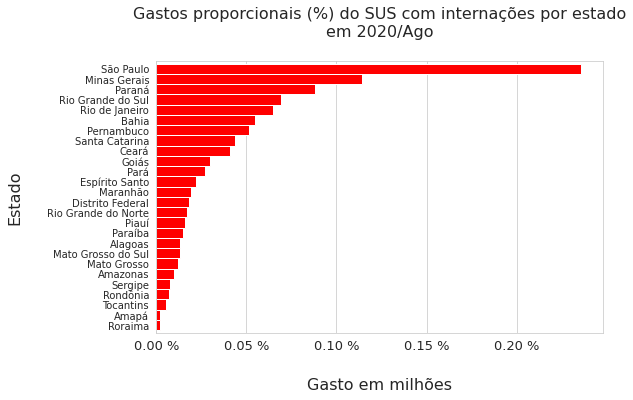

In [68]:
ax = proportional_spending.plot(figsize=(8, 5),
                cmap="flag",
                kind='barh',
                width=1)

# formatando a apresentação dos numeros
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.2f} %'))

# personalizando grafico
plt.xlabel('Gasto em milhões', labelpad=25, fontsize=16)
plt.ylabel('Estado', labelpad=25, fontsize=16)
plt.title(f'Gastos proporcionais (%) do SUS com internações por estado\nem {most_recent_month}', pad=25, fontsize=16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', grid_alpha=0)


plt.show()

In [63]:
df_full = df_wikipedia.join(df_recent_month_spending)
df_full

,População,% da pop. total,2020/Ago
Unidade federativa,,,
São Paulo,46289333,21.90,346512263.17
Minas Gerais,21331292,10.10,168024412.95
Rio de Janeiro,17366189,8.20,95274486.35
Bahia,14930634,7.10,80793117.08
Paraná,11516840,5.40,129375911.54
Rio Grande do Sul,11422973,5.40,101374341.51
Pernambuco,9616621,4.50,75704177.72
Ceará,9187103,4.30,59808605.59
Pará,8690745,4.10,39911193.02
